---
#### **Exploratory Data Analysis (EDA)**

In this section, we begin exploring the dataset to better understand the characteristics of job postings. This will help us identify patterns, trends, and potential red flags that differentiate real job listings from fraudulent ones.

We'll start with general EDA to get a high-level overview of the dataset, including:

- Basic structure and summary statistics
- Distribution of the target variable (`fraudulent`)
- Common job titles, locations, and companies
- Frequency of missing values
- Initial observations about salary and job posting metadata

This foundational understanding will guide our deeper analysis and help refine our approach for building a classification model.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/fake_job_postings.csv")


In [14]:
# Shape and data types
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics (numerical):")
display(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics (categorical):")
display(df.describe(include='object'))


Dataset shape: (17880, 18)

Data types:
 job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Summary statistics (numerical):


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000



Summary statistics (categorical):


,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


Target Variable Overview

Our main goal is to predict whether a job posting is **fraudulent (1)** or **legitimate (0)**. 

Understanding the distribution of this target variable is crucial because:

- It tells us if the dataset is balanced or skewed towards one class.
- Imbalanced classes may require special handling during modeling.

##### **Let's take a look at how many fake vs real job postings we have in the dataset.**


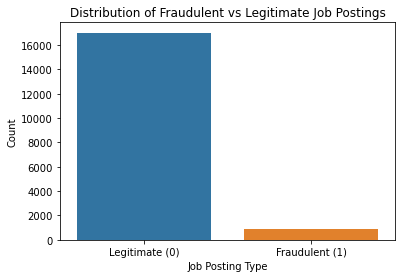

0    17014
1      866
Name: fraudulent, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting the distribution of the target variables
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Job Postings')
plt.xlabel('Job Posting Type')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

# let us also print counts to give the exact number behind the visual
print(df['fraudulent'].value_counts())

***Distribution of Fraudulent vs Legitimate Job Postings***

The bar plot shows the count of job postings labeled as either **Legitimate (0)** or **Fraudulent (1)**.

- The **x-axis** represents the job posting type:
  - **Legitimate (0)**: Genuine job postings.
  - **Fraudulent (1)**: Fake or scam job postings.

- The **y-axis** indicates the number of postings in each category.

From the plot, it is clear that legitimate postings greatly outnumber fraudulent ones. This means our dataset is imbalanced, with many more genuine listings than fake ones.

This class imbalance is important to consider in future modeling steps, as predictive models may become biased toward the majority (legitimate) class.

---

**Explore Categorical Features**

Here we visualize the distributions of key categorical variables to understand the common categories and any class imbalance within those features.


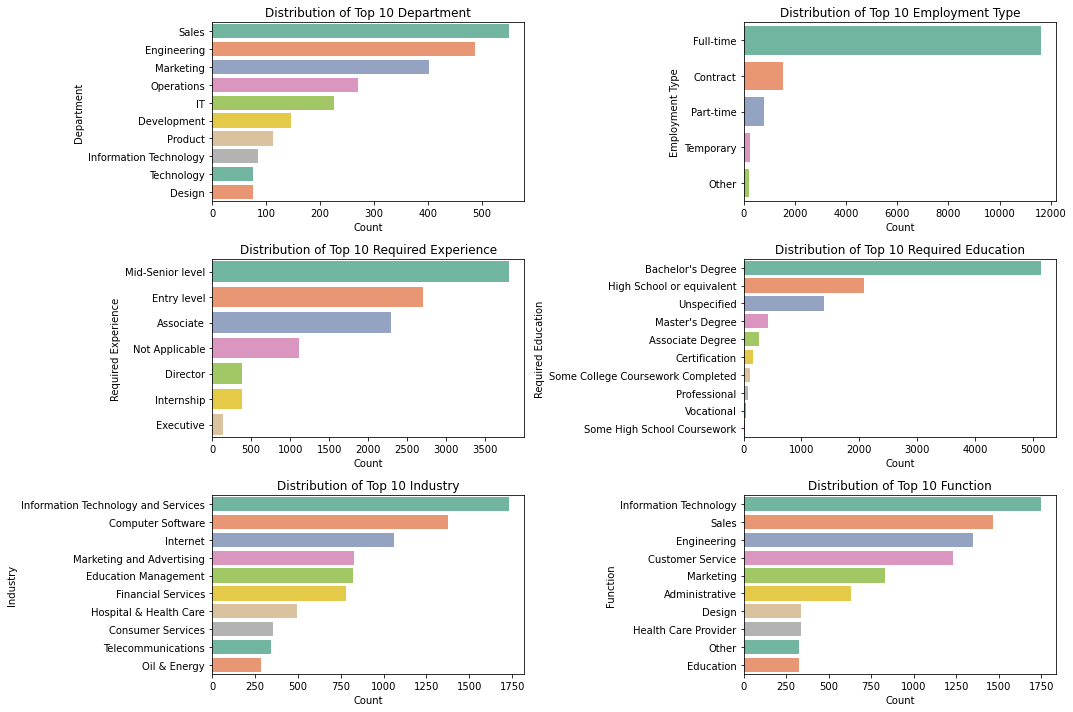

In [16]:
categorical_columns = ['department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Setting up the subplot grid of 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()


for i, column in enumerate(categorical_columns):
    top_values = df[column].value_counts().head(10)

    sns.barplot(x=top_values.values, y=top_values.index, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of Top 10 {column.replace("_", " ").title()}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column.replace("_", " ").title())

# Adjusting the layout to avoid overlapping
plt.tight_layout()
plt.show()


**Categorical Features vs Fraudulent Target**

These plots show how the different categories relate to whether a job posting is fraudulent or legitimate, revealing possible patterns or risk factors.


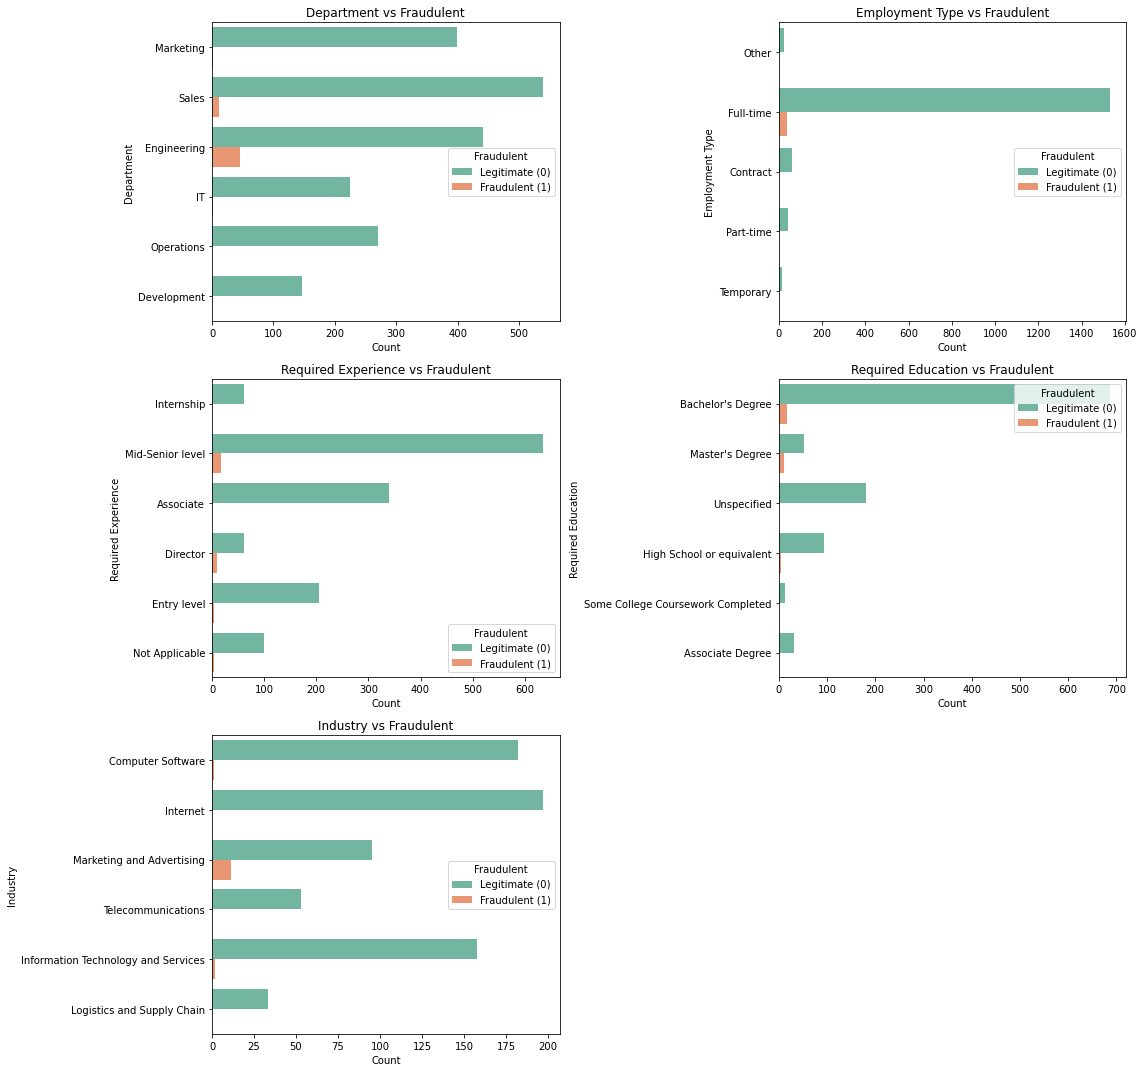

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

# plotting each features
for i, column in enumerate(categorical_columns):
    top_categories = df[column].value_counts().nlargest(6).index
    df = df[df[column].isin(top_categories)]

    sns.countplot(data=df, y=column, hue='fraudulent', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column.replace("_", " ").title()} vs Fraudulent')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(column.replace("_", " ").title())
    axes[i].legend(title='Fraudulent', labels=['Legitimate (0)', 'Fraudulent (1)'])

# removing the unused subplots
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()



These plots show that fraudulent jobs tend to avoid requiring high experience, specific education, or commitment (like full-time work). They also appear in broad, easy-to-fake categories. This insight can guide your feature selection and model strategy later.

**Explore Text Columns Length**

Text length distributions in key columns might help us understand if fraudulent posts tend to have shorter or longer descriptions or requirements, which could be an important feature.



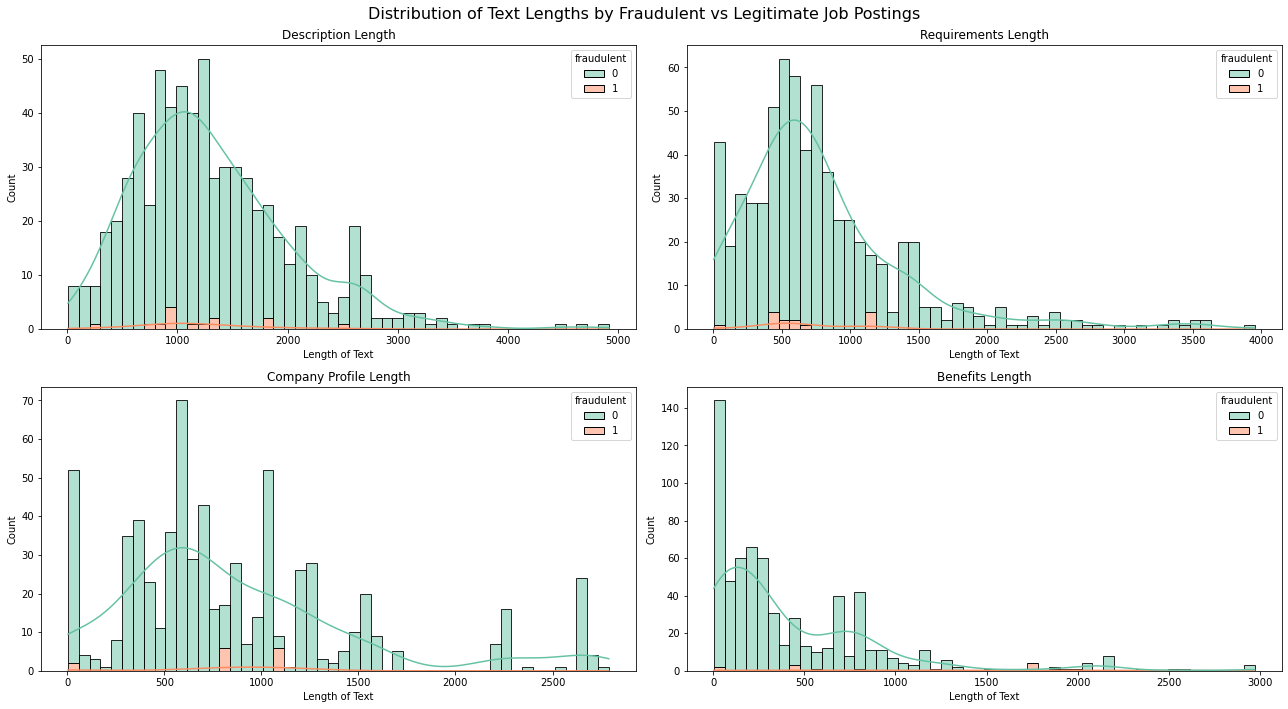

In [18]:
text_columns = ['description', 'requirements', 'company_profile', 'benefits']

# Creating new columns for text lengths
for column in text_columns:
    df[f'{column}_length'] = df[column].apply(lambda x: len(str(x)))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.suptitle('Distribution of Text Lengths by Fraudulent vs Legitimate Job Postings', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(text_columns):
    sns.histplot(data=df, x=f'{column}_length', hue='fraudulent', bins=50, kde=True, ax=axes[i], palette='Set2', multiple='stack')
    axes[i].set_title(f'{column.replace("_", " ").title()} Length')
    axes[i].set_xlabel('Length of Text')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Analyzing the length of key text fields (`description`, `requirements`, `company_profile`, `benefits`) and comparing them across fraudulent and legitimate job postings.

- **Description**: Legitimate jobs usually have longer, detailed descriptions. Fraudulent ones are shorter.
- **Requirements**: Real jobs list clear requirements. Fake ones often skip or keep it brief.
- **Company Profile**: Many are missing, but when present, legitimate jobs provide more info.
- **Benefits**: Most postings lack detailed benefits; not very useful for distinguishing fraud.

**Insight**: Short or missing text fields may signal fraudulent postings and can be useful features for modeling.


**Text Length by Fraudulent Status**
Box plots reveal that fraudulent job postings tend to have shorter or less consistent text content across fields like description, requirements, and company_profile. Legitimate postings usually show a wider range and longer average lengths, suggesting that fake jobs may use brief or templated content.


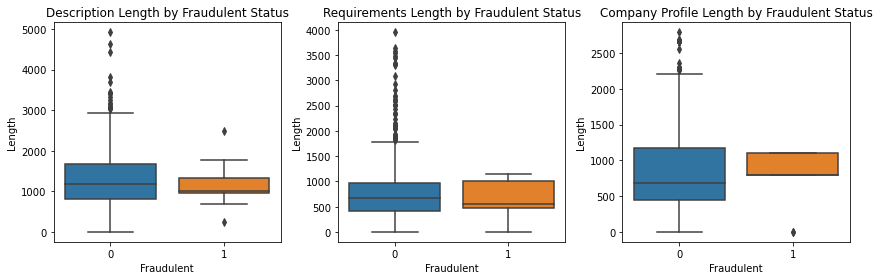

In [19]:
text_columns = ['description_length', 'requirements_length', 'company_profile_length']

plt.figure(figsize=(12, 4))
for i, column in enumerate(text_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='fraudulent', y=column, data=df)
    plt.title(f'{column.replace("_", " ").title()} by Fraudulent Status')
    plt.xlabel('Fraudulent')
    plt.ylabel('Length')
plt.tight_layout()
plt.show()


 **Correlation Heatmap for Numerical Columns**
 The correlation heatmap helps identify linear relationships between numerical variables and the target. Strong correlations can guide feature selection.


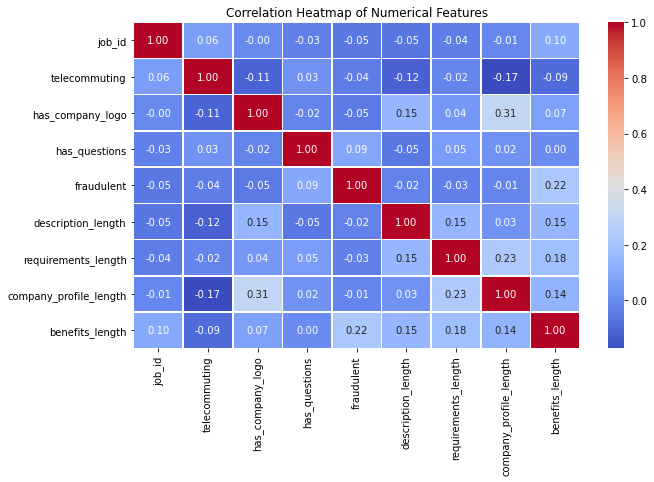

In [20]:
# Selecting only the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Computing the correlation matrix
corr_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Plotting a correlation heatmap for all numerical columns, including the target variable `fraudulent`.

- The heatmap shows how strongly pairs of features are related (values range from -1 to 1).
- High positive values (close to 1) indicate a strong direct relationship.
- High negative values (close to -1) indicate a strong inverse relationship.
- Values near 0 suggest no linear correlation.

This helps us understand relationships between features and can guide feature selection for modeling.


**Location Analysis**

We analyze the most common job posting locations to identify any geographic patterns. This may help reveal whether certain locations are more associated with fraudulent job posts.


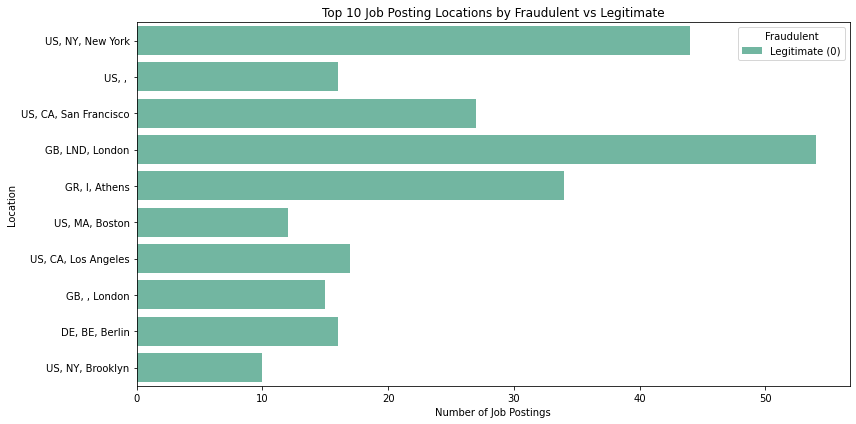

In [21]:
top_locations = df['location'].value_counts().head(10).index

# Filtering for only those top locations
top_location_df = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_location_df, y='location', hue='fraudulent', palette='Set2')
plt.title('Top 10 Job Posting Locations by Fraudulent vs Legitimate')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.legend(title='Fraudulent', labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.tight_layout()
plt.show()


The plot highlights the top 10 job posting locations. We can observe which cities or regions have a higher count of fraudulent job postings, helping identify any geographic risk factors.


**Fraud Rate by Top Locations**

This plot shows the proportion of fraudulent postings in each top location, highlighting riskier geographic areas.



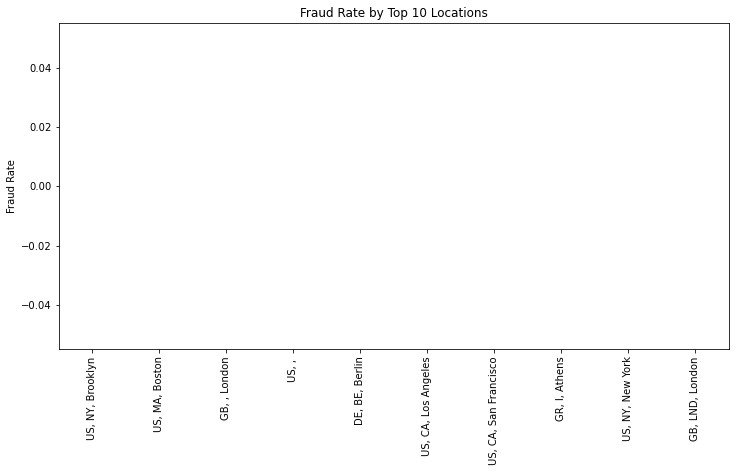

In [22]:
location_fraud_rate = df.groupby('location')['fraudulent'].mean().loc[top_locations].sort_values(ascending=False)
plt.figure(figsize=(12,6))
location_fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Top 10 Locations')
plt.ylabel('Fraud Rate')
plt.show()
